<a href="https://colab.research.google.com/github/nurmuhimawann/C22-098-Fruity-Website/blob/ml-development/notebooks/Fruity_CNN_Improvement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link drive dataset:
https://drive.google.com/drive/folders/1JlQCJ2ZJosZu9cWl3ESBzjbEJzjZ3Yi8?usp=sharing

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip list

Package                       Version
----------------------------- ----------------------
absl-py                       1.3.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.3
aiosignal                     1.3.1
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
asynctest                     0.13.0
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.9
bokeh

In [ ]:
# download my API >> https://drive.google.com/file/d/1x5RMQ3yp049uZIxtIqNg3PwFqOqAAcu3/view?usp=share_link
! pip install gdown
! gdown 1x5RMQ3yp049uZIxtIqNg3PwFqOqAAcu3
! ls

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Downloading...
From: https://drive.google.com/uc?id=1x5RMQ3yp049uZIxtIqNg3PwFqOqAAcu3
To: /content/kaggle.json
100% 69.0/69.0 [00:00<00:00, 135kB/s]
kaggle.json  sample_data


In [ ]:
# library
! pip install kaggle

# connect myAPI
! mkdir ~/.kaggle # making directory
! cp '/content/kaggle.json' ~/.kaggle/kaggle.json # copy API
! chmod 600 ~/.kaggle/kaggle.json
! ls ~/.kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
kaggle.json


In [ ]:
# source dataset >> https://www.kaggle.com/datasets/yusufemir/lemon-quality-dataset
# >> https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification

! kaggle datasets download yusufemir/lemon-quality-dataset
! kaggle datasets download sriramr/fruits-fresh-and-rotten-for-classification

 90% 210M/233M [00:01<00:00, 128MB/s]
100% 233M/233M [00:01<00:00, 146MB/s]
 99% 3.56G/3.58G [00:20<00:00, 207MB/s]
100% 3.58G/3.58G [00:21<00:00, 183MB/s]


In [ ]:
# unzip
! unzip lemon-quality-dataset.zip -d /content/lemon
! mv "/content/lemon" "/content/dataset"
! unzip fruits-fresh-and-rotten-for-classification.zip -d /content/dataset/fresh-rotten

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/fresh-rotten/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.09 PM.png  
  inflating: /content/dataset/fresh-rotten/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.18 PM.png  
  inflating: /content/dataset/fresh-rotten/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.24 PM.png  
  inflating: /content/dataset/fresh-rotten/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.37 PM.png  
  inflating: /content/dataset/fresh-rotten/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.51 PM.png  
  inflating: /content/dataset/fresh-rotten/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.02 PM.png  
  inflating: /content/dataset/fresh-rotten/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.12 PM.png  
  inflating: /content/dataset/fresh-rotten/dataset/train/rot

In [ ]:
import os

# move dataset
! mv "/content/dataset/fresh-rotten/dataset/dataset/train" "/content/dataset/fruits/"

# move lemons
! mv "/content/dataset/lemon_dataset/bad_quality" "/content/dataset/fruits"
! mv "/content/dataset/lemon_dataset/good_quality" "/content/dataset/fruits"

os.rename(r"/content/dataset/fruits/bad_quality", r"/content/dataset/fruits/rottenlemons")
os.rename(r"/content/dataset/fruits/good_quality", r"/content/dataset/fruits/freshlemons")

In [ ]:
import os
import tensorflow as tf

In [ ]:
base_dir = r"/content/dataset/fruits"

In [ ]:
label_and_items = {}
labels = os.listdir(base_dir)

for label in labels:
  items = os.listdir(os.path.join(base_dir, label))
  label_and_items[label] = len(items)

label_and_items

{'rottenbanana': 2224,
 'freshapples': 1693,
 'rottenlemons': 951,
 'freshoranges': 1466,
 'rottenapples': 2342,
 'freshbanana': 1581,
 'rottenoranges': 1595,
 'freshlemons': 1125}

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(
            base_dir,
            target_size=(150, 150),
            batch_size=15,
            class_mode='categorical',
            subset='training')
    
validation_generator = train_datagen.flow_from_directory(
            base_dir,
            target_size=(150, 150),
            batch_size=15,
            class_mode='categorical',
            subset='validation')

Found 10384 images belonging to 8 classes.
Found 2593 images belonging to 8 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import backend as K

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(labels), activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)       0

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') >= 0.98 and logs.get('val_accuracy') >= 0.99 and logs.get('loss') >= 0.03:
      print('STOP')
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history=model.fit(
      train_generator,
      # steps_per_epoch=100,  #berapa batch yang akan dieksekusi pada setiap epoch
      epochs=50, #tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator, #menampilkan akurasi pengujian data validasi
      # validation_steps=50,  #berapa batch yang akan dieksekusi pada setiap epoch
      verbose=1,
      callbacks=[callbacks])

Epoch 1/30
520/520 [==============================] - 65s 108ms/step - loss: 0.7550 - accuracy: 0.7229 - val_loss: 0.4318 - val_accuracy: 0.8515
Epoch 2/30
520/520 [==============================] - 53s 101ms/step - loss: 0.3563 - accuracy: 0.8730 - val_loss: 0.2889 - val_accuracy: 0.8851
Epoch 3/30
520/520 [==============================] - 54s 104ms/step - loss: 0.2688 - accuracy: 0.9045 - val_loss: 0.1592 - val_accuracy: 0.9468
Epoch 4/30
520/520 [==============================] - 53s 102ms/step - loss: 0.1998 - accuracy: 0.9290 - val_loss: 0.1657 - val_accuracy: 0.9414
Epoch 5/30
520/520 [==============================] - 54s 104ms/step - loss: 0.1858 - accuracy: 0.9349 - val_loss: 0.1089 - val_accuracy: 0.9645
Epoch 6/30
520/520 [==============================] - 54s 103ms/step - loss: 0.1608 - accuracy: 0.9455 - val_loss: 0.1811 - val_accuracy: 0.9352
Epoch 7/30
520/520 [==============================] - 54s 104ms/step - loss: 0.1483 - accuracy: 0.9479 - val_loss: 0.1294 - val_ac

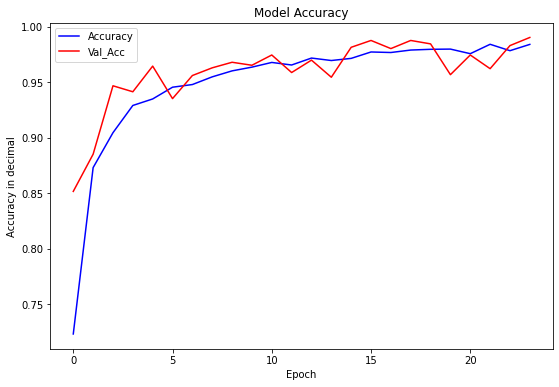

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))

plt.title('Model Accuracy')
plt.ylabel('Accuracy in decimal')
plt.xlabel('Epoch')

acc = plt.plot(history.history['accuracy'], color='blue')
val_acc = plt.plot(history.history['val_accuracy'], color='red')

plt.legend(['Accuracy', 'Val_Acc'], loc='upper left')

plt.show()

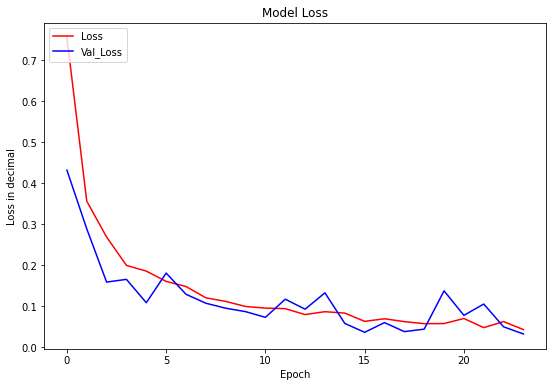

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))

plt.title('Model Loss')
plt.ylabel('Loss in decimal')
plt.xlabel('Epoch')

loss = plt.plot(history.history['loss'], color='red')
val_loss = plt.plot(history.history['val_loss'], color='blue')

plt.legend(['Loss', 'Val_Loss'], loc='upper left')

plt.show()

In [ ]:
# Konversi model.
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = converter.convert()

# with tf.io.gfile.GFile('model.tflite', 'wb') as f:
#   f.write(tflite_model)

In [ ]:
model.save("model/model_best.hdf5")

In [ ]:
import numpy as np
from google.colab import files
import tensorflow
# from keras.preprocessing import image # this is deprecated, jadi ngga usah digunain lagi
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  arr = model.predict(images, batch_size=10)
  if arr[0][0]==1:
    labels='fresh apple'
  elif arr[0][1]==1:
    labels='fresh banana'
  elif arr[0][2]==1:
    labels='fresh lemons'
  elif arr[0][3]==1:
    labels='fresh oranges'
  elif arr[0][4]==1:
    labels='rotten apples'
  elif arr[0][5]==1:
    labels='rotten banana'
  elif arr[0][6]==1:
    labels='rotten lemons'
  elif arr[0][7]==1:
    labels='rotten oranges'
print('{} is a {}'.format(fn,labels))

NameError: ignored

In [ ]:
classes

NameError: ignored

In [ ]:
# from keras.models import load_model
# model = load_model('/content/model_best_fruity.hdf5')